# <span style="color:purple">House Price Prediction & EDA</span>

## Installing and importing modules

In [2]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Review the dataset

#### Read csv file

In [134]:
print(os.path.exists("kc_house_data.csv"))

True


In [135]:
df = pd.read_csv("kc_house_data.csv")

#### Data shape

In [136]:
print('columns count - ',len(df.columns), '\n')
print('columns: ',list(df.columns))

columns count -  21 

columns:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


- **id** – Унікальний ідентифікатор нерухомості. 
- **date** – Дата продажу нерухомості.
- **price** – Ціна, за яку було продано нерухомість (залежна змінна, яку можна прогнозувати за допомогою регресії).
- **bedrooms** – Кількість спалень.
- **bathrooms** – Кількість ванних кімнат.
- **sqft_living** – Площа житлового приміщення (в квадратних футах).
- **sqft_lot** – Площа ділянки (в квадратних футах).
- **floors** – Кількість поверхів у будинку.
- **waterfront** – Наявність виду на воду (1 – є, 0 – немає).
- **view** – Оцінка виду з будинку (0 – відсутній, до 4 – чудовий вид).
- **condition** – Стан будинку (1 – поганий, до 5 – відмінний).
- **grade** – Оцінка якості конструкції та дизайну будинку (більший бал відповідає кращій якості).
- **sqft_above** – Площа приміщення над підвалом (в квадратних футах).
- **sqft_basement** – Площа підвалу (в квадратних футах).
- **yr_built** – Рік побудови будинку.
- **yr_renovated** – Рік останньої реконструкції будинку.
- **zipcode** – Поштовий індекс.
- **lat** – Широта місця розташування будинку.
- **long** – Довгота місця розташування будинку.
- **sqft_living15** – Площа житлового приміщення у 15 найближчих сусідів (в квадратних футах).
- **sqft_lot15** – Площа ділянок у 15 найближчих сусідів (в квадратних футах).

In [137]:
print('Samples count: ', df.shape[0])

Samples count:  21613


In [138]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Types

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Descriptive Statistics

In [140]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Chek missing data

In [141]:
print("Any missing sample in dataset:",df.isnull().values.any())

Any missing sample in dataset: False


#### Unique values count

In [142]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# <span style="color:purple">EDA </span>

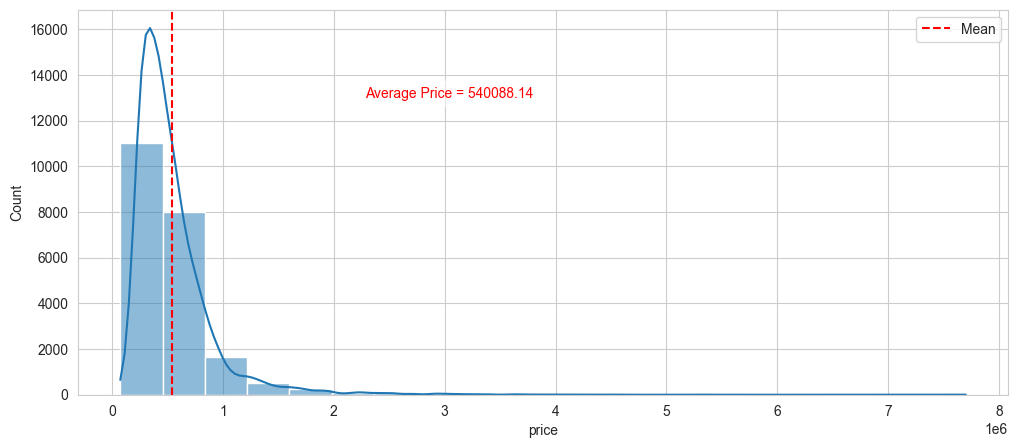

In [143]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

plotd = sns.histplot(df['price'], kde=True, bins=20)

mean_line = plt.axvline(df['price'].mean(), c='red', linestyle='dashed', label='Mean')

plt.text(0.49, 0.8, f'Average Price = {df["price"].mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.show()

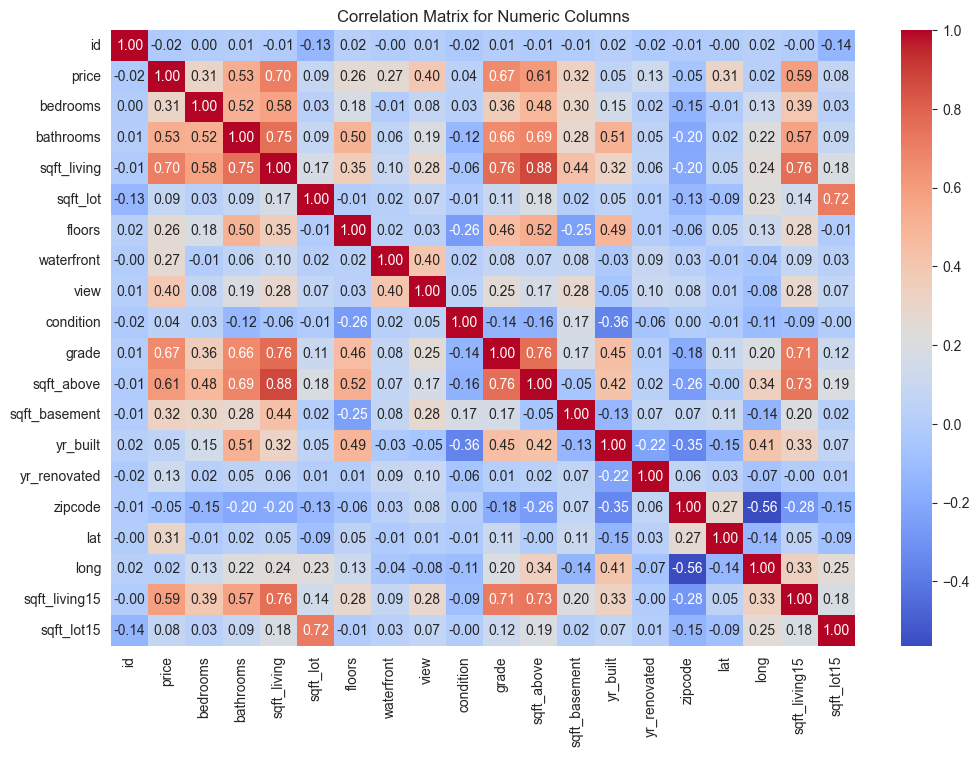

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вибір тільки числових колонок
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Розрахунок матриці кореляцій для числових колонок
numeric_corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Numeric Columns")
plt.show()


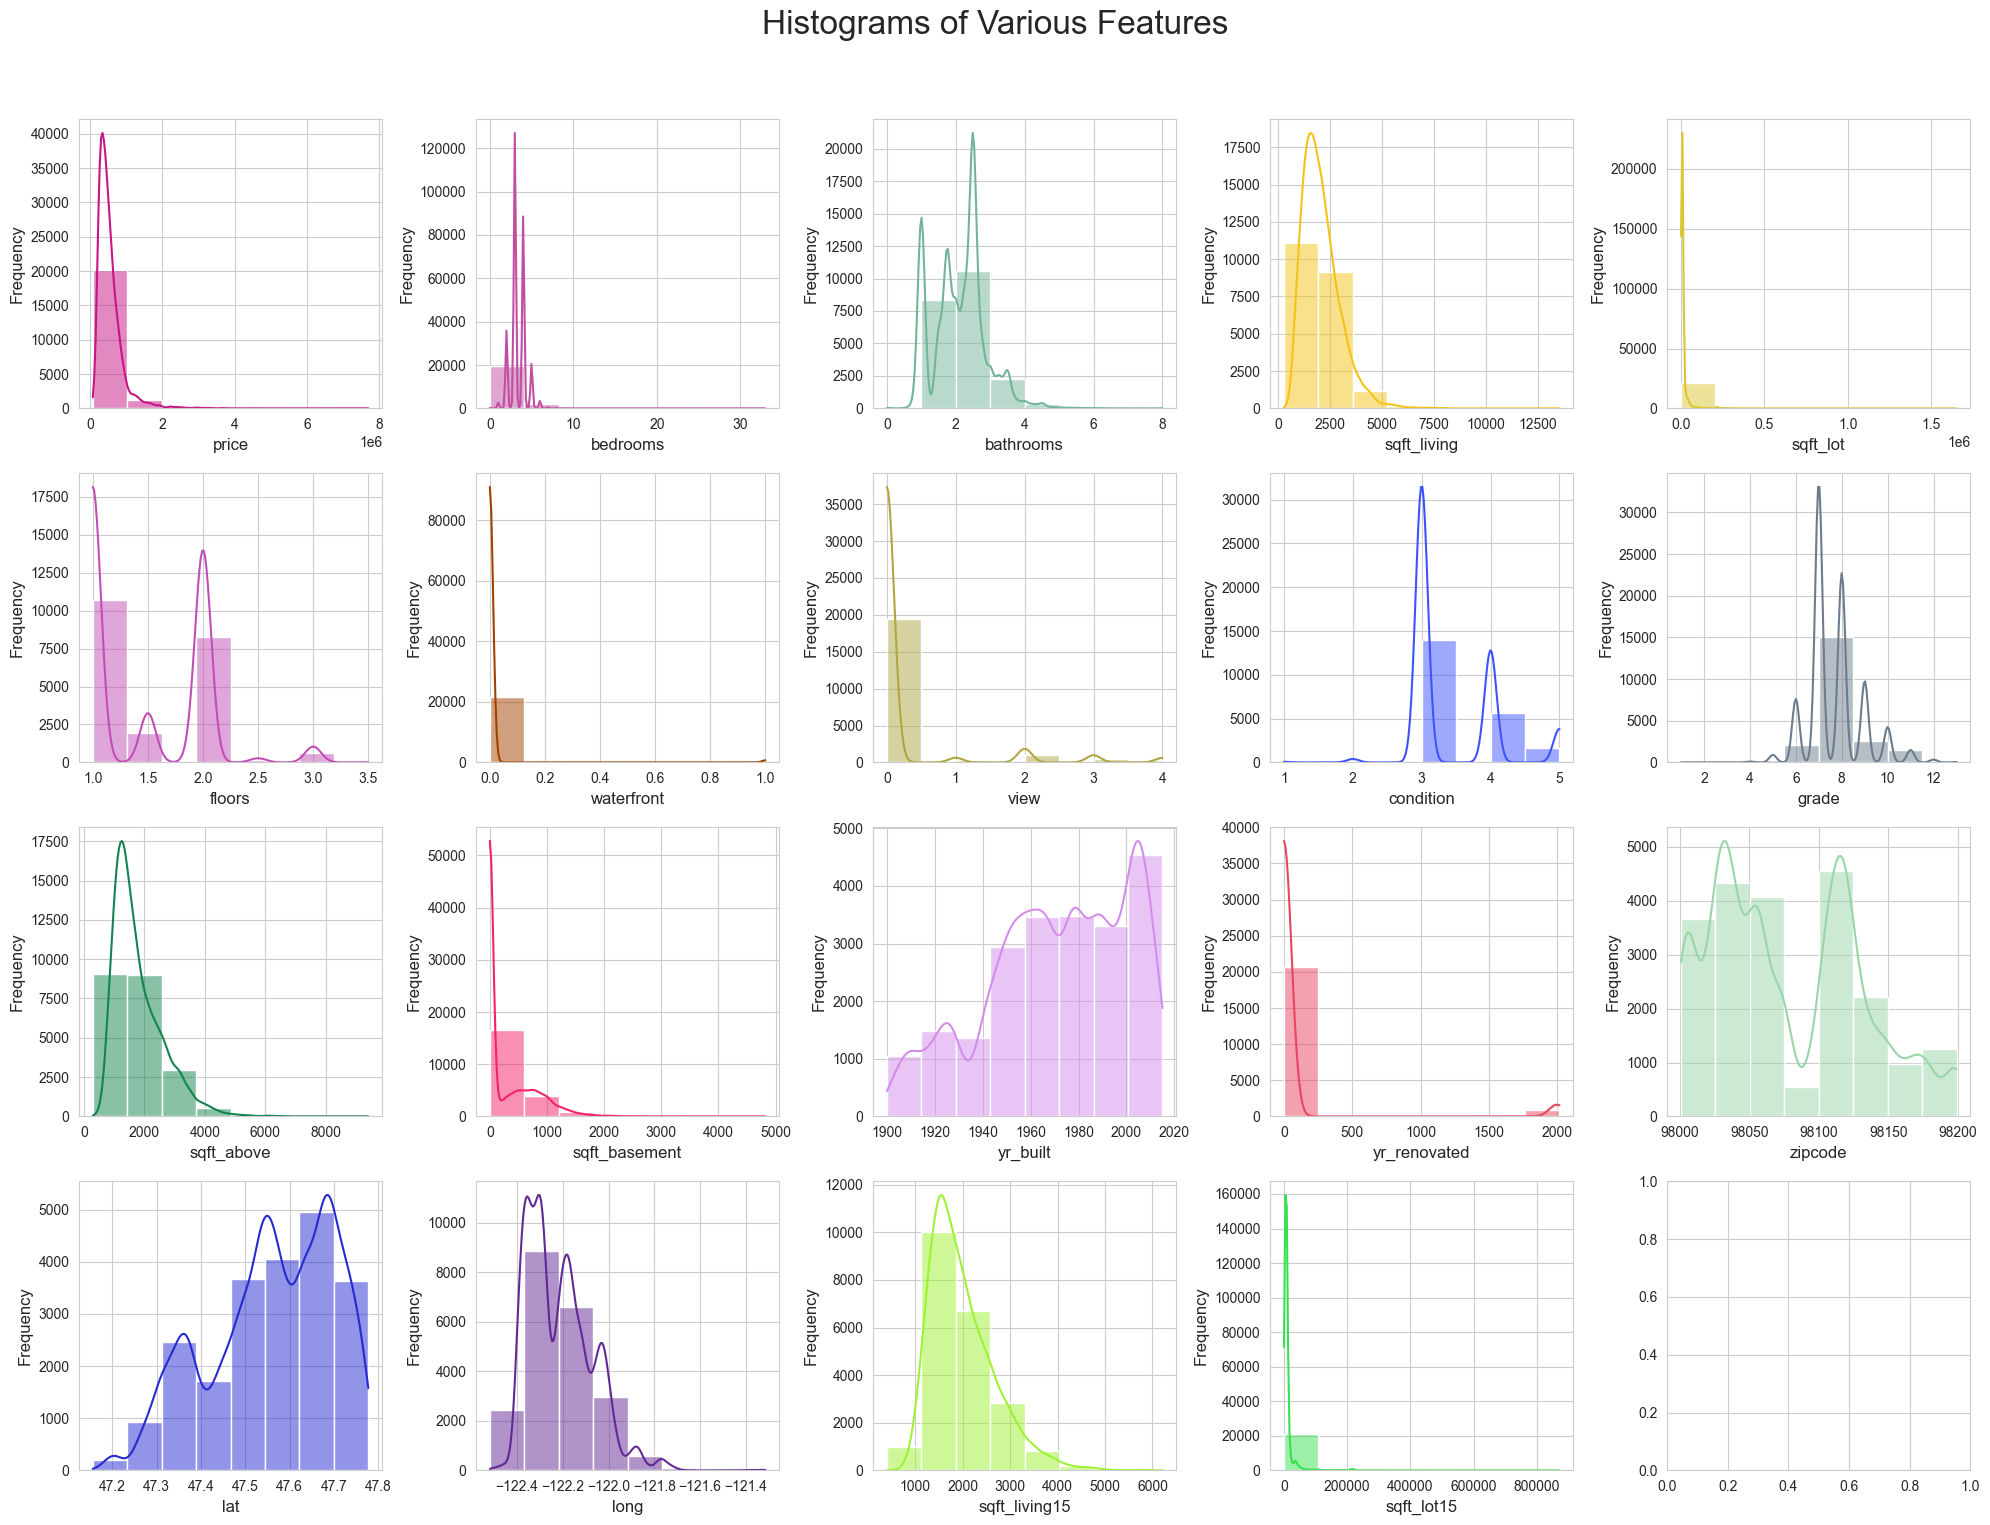

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

# Вибираємо всі числові колонки, виключаючи 'id', 'date'
selected_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['id', 'date']]

# Генеруємо кольори для графіків
colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

# Визначаємо кількість графіків, рядів і колонок
num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(5, num_subplots)

# Створюємо сітку графіків
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

# Побудова кожної гістограми
for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(df[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  
            axes[i, j].set_ylabel("Frequency", fontsize=12)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


c:\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


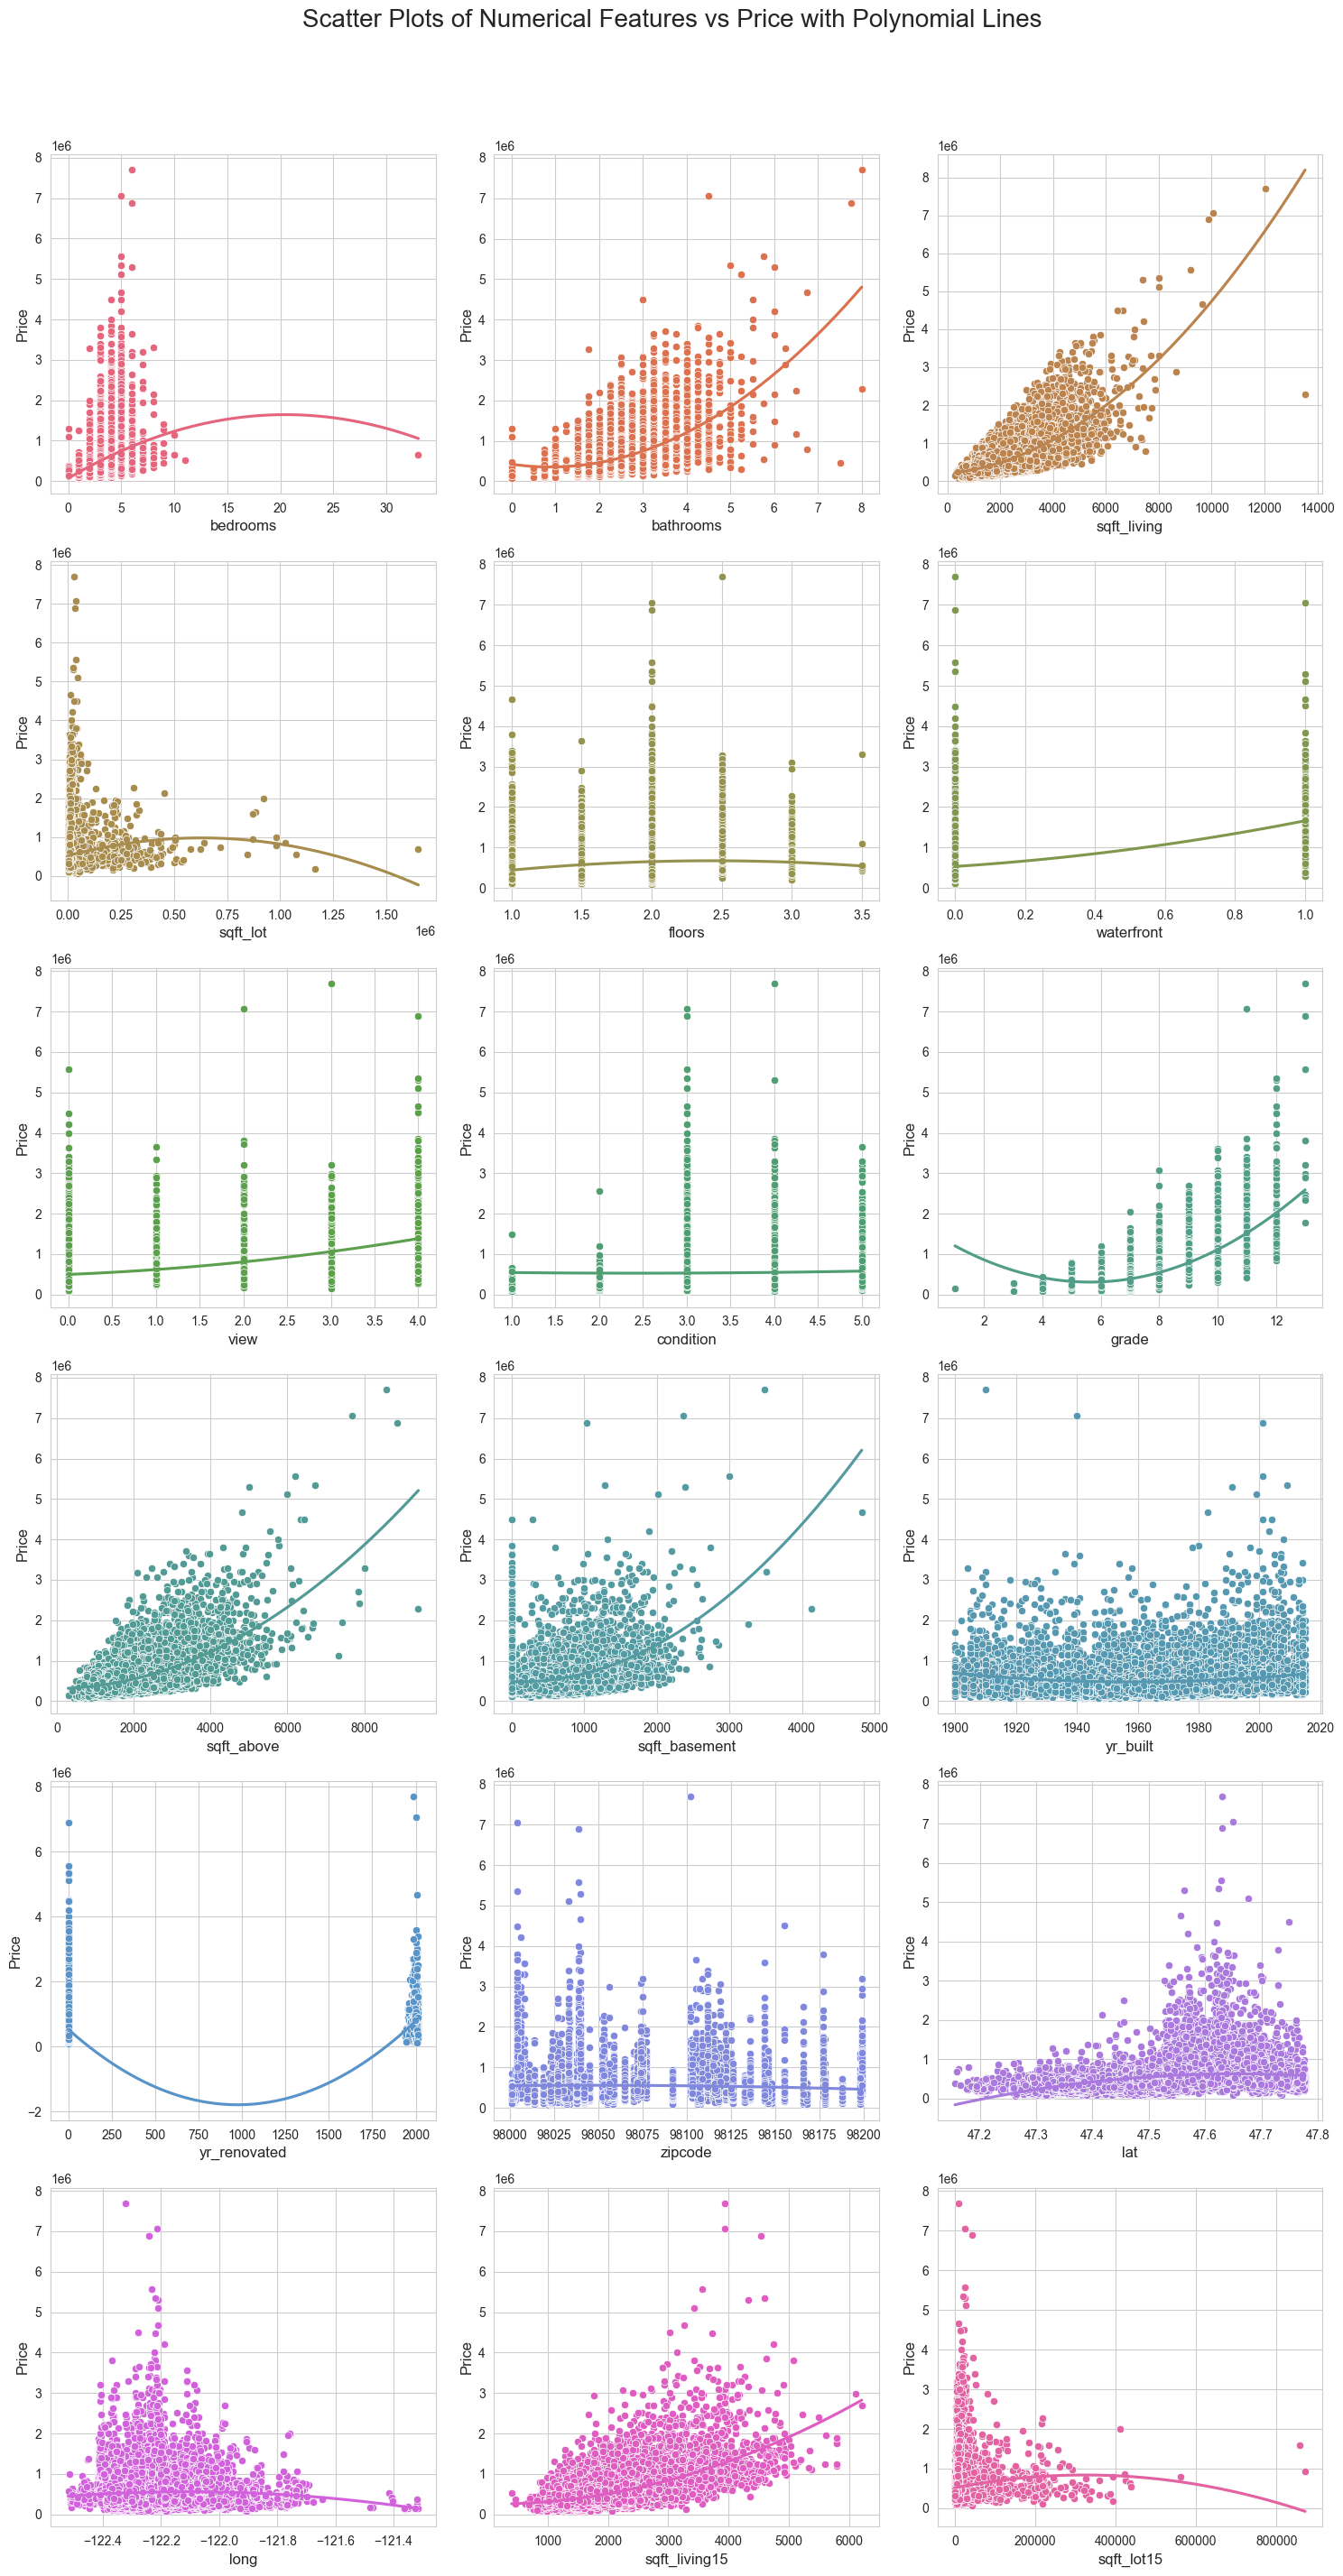

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
selected_cols = [col for col in numerical_cols if col not in ['price', 'id']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

# Створюємо сітку графіків
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Scatter Plots of Numerical Features vs Price with Polynomial Lines", size=20)

# Використовуємо палітру кольорів для графіків
palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

# Побудова кожного графіка розсіювання
for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.scatterplot(x=selected_cols[idx], y='price', data=df, ax=axes[i, j], color=palette[idx])
            
            sns.regplot(x=selected_cols[idx], y='price', data=df, ax=axes[i, j], scatter=False, order=2, color=palette[idx], ci=None)

            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("Price", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# <span style="color:purple">Feature Engineering </span>

### Removing unnecessary columns

Removing columns that do not influence the target variable.

In [147]:
columns_to_drop = ['id', 'date', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15']

df = df.drop(columns=columns_to_drop)

df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


Removing columns with multicollinearity.

In [148]:
columns_to_drop = ['sqft_above']

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168,1800


In [149]:
print('columns: ',list(df.columns))

columns:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'lat', 'sqft_living15']


- **price** – Ціна, за яку було продано нерухомість (залежна змінна).
- **bedrooms** – Кількість спалень.
- **sqft_living** – Площа житлового приміщення (в квадратних футах).
- **floors** – Кількість поверхів у будинку.
- **waterfront** – Наявність виду на воду (1 – є, 0 – немає).
- **view** – Оцінка виду з будинку (0 – відсутній, до 4 – чудовий вид).
- **sqft_basement** – Площа підвалу (в квадратних футах).
- **lat** – Широта місця розташування будинку.
- **long** – Довгота місця розташування будинку.

### Outlier Handling

In [150]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,7.656873,291.509045,47.560053,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,1.175459,442.575043,0.138564,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,0.000000,47.155900,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,7.000000,0.000000,47.471000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,0.000000,47.571800,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,560.000000,47.678000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,4820.000000,47.777600,6210.000000


In [151]:
# Let's define the function for finding the skewed boundaries

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [152]:
# Find the exact upper and lower limits for outliers for each column using the current IQR-based method

price_upper_limit, price_lower_limit = find_skewed_boundaries(df, 'price', 3)
sqft_living_upper_limit, sqft_living_lower_limit = find_skewed_boundaries(df, 'sqft_living', 2)
bedrooms_upper_limit, bedrooms_lower_limit = find_skewed_boundaries(df, 'bedrooms', 3)
sqft_basement_upper_limit, sqft_basement_lower_limit = find_skewed_boundaries(df, 'sqft_basement', 2)

In [153]:
# Display boundaries for each column

boundaries = {
    "Price Upper Limit": price_upper_limit, 
    "Price Lower Limit": price_lower_limit,
    "Sqft Living Upper Limit": sqft_living_upper_limit, 
    "Sqft Living Lower Limit": sqft_living_lower_limit,
    "Bedrooms Upper Limit": bedrooms_upper_limit, 
    "Bedrooms Lower Limit": bedrooms_lower_limit,
    "Sqft Basement Upper Limit": sqft_basement_upper_limit, 
    "Sqft Basement Lower Limit": sqft_basement_lower_limit
}

boundaries

{'Price Upper Limit': 1614150.0,
 'Price Lower Limit': -647200.0,
 'Sqft Living Upper Limit': 4796.0,
 'Sqft Living Lower Limit': -819.0,
 'Bedrooms Upper Limit': 7.0,
 'Bedrooms Lower Limit': 0.0,
 'Sqft Basement Upper Limit': 1680.0,
 'Sqft Basement Lower Limit': -1120.0}

In [154]:
# Define a function to count the number of outliers for each variable
def count_outliers(df, variable, upper_limit, lower_limit):
    return ((df[variable] > upper_limit) | (df[variable] < lower_limit)).sum()

price_outliers = count_outliers(df, 'price', price_upper_limit, price_lower_limit)
sqft_living_outliers = count_outliers(df, 'sqft_living', sqft_living_upper_limit, sqft_living_lower_limit)
bedrooms_outliers = count_outliers(df, 'bedrooms', bedrooms_upper_limit, bedrooms_lower_limit)
sqft_basement_outliers = count_outliers(df, 'sqft_basement', sqft_basement_upper_limit, sqft_basement_lower_limit)

print(f"Price outliers: {price_outliers}")
print(f"Sqft Living outliers: {sqft_living_outliers}")
print(f"Bedrooms outliers: {bedrooms_outliers}")
print(f"Sqft Basement outliers: {sqft_basement_outliers}")

# Count the total number of rows that contain at least one outlier
outliers_mask = (
    (df['price'] > price_upper_limit) | (df['price'] < price_lower_limit) |
    (df['sqft_living'] > sqft_living_upper_limit) | (df['sqft_living'] < sqft_living_lower_limit) |
    (df['bedrooms'] > bedrooms_upper_limit) | (df['bedrooms'] < bedrooms_lower_limit) |
    (df['sqft_basement'] > sqft_basement_upper_limit) | (df['sqft_basement'] < sqft_basement_lower_limit)
)

total_outliers_rows = outliers_mask.sum()

print(f"Total rows with outliers: {total_outliers_rows}")

Price outliers: 420
Sqft Living outliers: 258
Bedrooms outliers: 24
Sqft Basement outliers: 203
Total rows with outliers: 669


In [155]:
# Remove rows where any of the conditions for outliers in 'price', 'sqft_living', 'bedrooms', or 'sqft_basement' are true,
df_cleaned = df[
    ((df['price'].isnull()) | ((df['price'] <= price_upper_limit) & (df['price'] >= price_lower_limit))) &
    ((df['sqft_living'].isnull()) | ((df['sqft_living'] <= sqft_living_upper_limit) & (df['sqft_living'] >= sqft_living_lower_limit))) &
    ((df['bedrooms'].isnull()) | ((df['bedrooms'] <= bedrooms_upper_limit) & (df['bedrooms'] >= bedrooms_lower_limit))) &
    ((df['sqft_basement'].isnull()) | ((df['sqft_basement'] <= sqft_basement_upper_limit) & (df['sqft_basement'] >= sqft_basement_lower_limit)))
]

final_count = df_cleaned.shape[0]

# Output the number of rows before and after removing outliers
initial_count = df.shape[0]
initial_count, final_count


(21613, 20944)

In [156]:
df = df_cleaned
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat,sqft_living15
count,2.094400e+04,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000
mean,4.998961e+05,3.334798,2.069459,1999.676280,1.486154,0.004249,0.194089,7.578925,267.186641,47.558700,1944.762271
std,2.501903e+05,0.874834,0.717735,782.503821,0.538473,0.065051,0.686012,1.084668,400.828683,0.139733,635.846870
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,0.000000,47.155900,399.000000
25%,3.190000e+05,3.000000,1.500000,1410.000000,1.000000,0.000000,0.000000,7.000000,0.000000,47.465975,1480.000000
50%,4.430000e+05,3.000000,2.250000,1880.000000,1.000000,0.000000,0.000000,7.000000,0.000000,47.569700,1820.000000
75%,6.200000e+05,4.000000,2.500000,2480.000000,2.000000,0.000000,0.000000,8.000000,520.000000,47.679000,2310.000000
max,1.610000e+06,7.000000,5.750000,4790.000000,3.500000,1.000000,4.000000,12.000000,1680.000000,47.777600,5790.000000


# <span style="color:purple">Model Selection </span>

### Models

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

# Поділ даних на ознаки (X) та цільову змінну (y)
X = df.drop(columns=['price'])  
y = df['price']

# Розподіл даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [158]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Визначаємо моделі
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

algo = [xgbt, lm, ridge, lasso, knn, rf, dtree]

result = []

# Цикл для тренування і оцінки кожної моделі
for i in algo:
    start = time.process_time()
    ml_model = i.fit(X_train, y_train)
    result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
    print(str(i).split("(")[0], "✓    ", "{}".format(round(time.process_time() - start, 3)), "sec")

result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")

print(result)


XGBRegressor ✓     1.234 sec
LinearRegression ✓     0.094 sec
Ridge ✓     0.0 sec
Lasso ✓     0.391 sec
KNeighborsRegressor ✓     3.812 sec
RandomForestRegressor ✓     10.047 sec
DecisionTreeRegressor ✓     0.172 sec
                                Train_Score  Test_Score     Train_Rmse  \
Algorithm                                                                
XGBRegressor_baseline              0.909005    0.801700   75472.315929   
RandomForestRegressor_baseline     0.970302    0.801148   43116.367522   
KNeighborsRegressor_baseline       0.824049    0.746882  104948.002074   
Ridge_baseline                     0.645766    0.654720  148909.692468   
Lasso_baseline                     0.645766    0.654720  148909.692044   
LinearRegression_baseline          0.645766    0.654720  148909.692005   
DecisionTreeRegressor_baseline     0.998437    0.622429    9892.685858   

                                    Test_Rmse      Train_Mae       Test_Mae  
Algorithm                             

The best results are achieved by the XGBRegressor method.

### Variable Importance

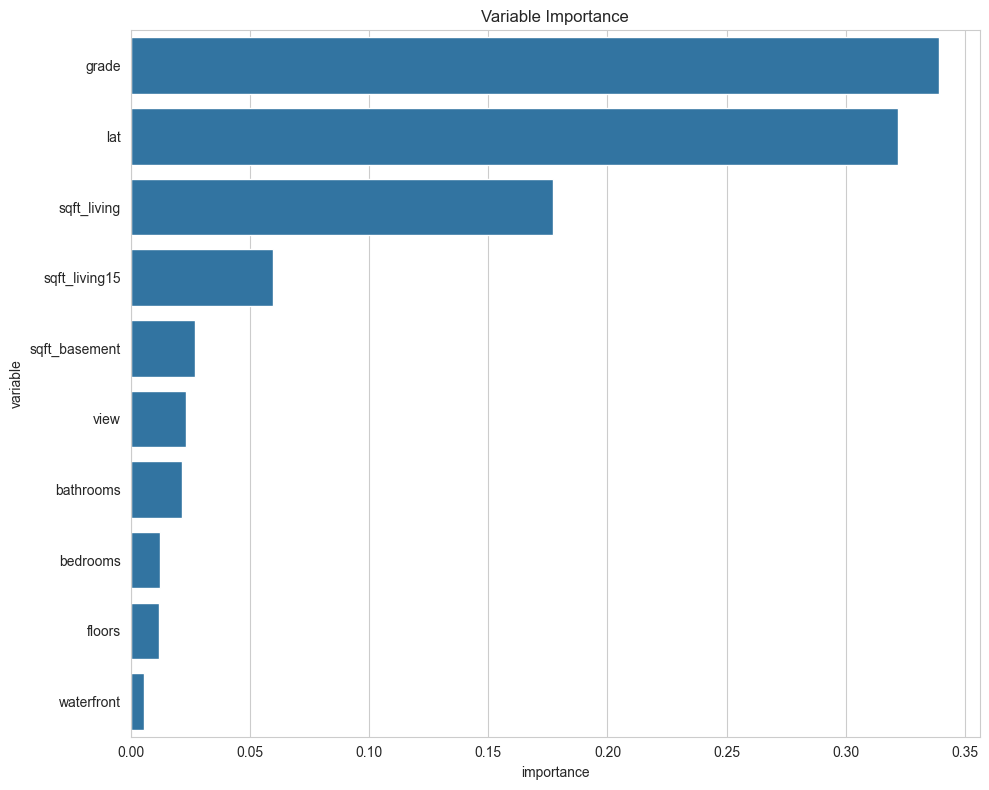

In [159]:
feature_names = X.columns  

rankings = ml_model.feature_importances_.tolist()

# Створіть DataFrame з важливостями ознак, використовуючи збережені імена колонок
importance = pd.DataFrame(sorted(zip(feature_names, rankings), reverse=True),
                          columns=["variable", "importance"]).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))  
sns.barplot(x="importance", y="variable", data=importance) 
plt.title('Variable Importance')
plt.tight_layout()
plt.show()


### K-fold validation

In [161]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []

# Перебираємо кожен розподіл k-fold
for train_index, val_index in kfold.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model = xgb.XGBRegressor(random_state=42)
    
    model.fit(X_train_fold, y_train_fold)
    
    y_val_pred = model.predict(X_val_fold)
    
    val_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    val_r2 = r2_score(y_val_fold, y_val_pred)
    val_mae = mean_absolute_error(y_val_fold, y_val_pred)
    
    fold_results.append({'RMSE': val_rmse, 'R2': val_r2, 'MAE': val_mae})
    
    print(f'Fold Metrics - RMSE: {val_rmse:.2f}, R2: {val_r2:.2f}, MAE: {val_mae:.2f}')

# Підсумкові метрики для k-fold
fold_results_df = pd.DataFrame(fold_results)
print("\nAverage K-Fold Metrics:")
print(fold_results_df.mean())

# Тренування моделі на всіх тренувальних даних та оцінка на тестових даних
final_model = xgb.XGBRegressor(random_state=42)
final_model.fit(X_train, y_train)

y_test_pred = final_model.predict(X_test)

# Оцінка на тестових даних
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f'RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}, MAE: {test_mae:.2f}')


Fold Metrics - RMSE: 112244.42, R2: 0.80, MAE: 75068.44
Fold Metrics - RMSE: 109799.16, R2: 0.79, MAE: 74043.02
Fold Metrics - RMSE: 120177.80, R2: 0.78, MAE: 79083.61
Fold Metrics - RMSE: 119631.94, R2: 0.77, MAE: 78320.51
Fold Metrics - RMSE: 114301.95, R2: 0.79, MAE: 76211.80

Average K-Fold Metrics:
RMSE    115231.051985
R2           0.787718
MAE      76545.476295
dtype: float64

Test Set Metrics:
RMSE: 111390.70, R2: 0.80, MAE: 74666.80


# <span style="color:purple">Hyperparameter Tuning</span>

#### Define target and features columns

In [162]:
X = df.drop(columns=['price'])  
y = df['price']

#### Building a Baseline GXGBRegressor Model

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test Set Metrics:")
print(f'RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R2: {test_r2:.2f}')

Test Set Metrics:
RMSE: 110607.66, MAE: 75063.08, R2: 0.80


In [166]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Hyperparameter Tuning

In [167]:
param_grid = {
    'n_estimators': [75, 100, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

- n_estimators - кількість дерев, які будуть побудовані в моделі.
- max_depth - максимальна глибина кожного дерева.
- learning_rate - коефіцієнт навчання, який визначає, наскільки сильно модель коригує свої помилки з кожною ітерацією.
- subsample - пропорція навчальних даних, яку потрібно використовувати для кожного дерева.
- colsample_bytree - пропорція ознак (колонок), яка використовується для побудови кожного дерева.

In [168]:
from sklearn.model_selection import GridSearchCV

# Ініціалізація XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Налаштування GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=5, 
                           verbose=3, 
                           return_train_score=True, 
                           n_jobs=-1)

In [169]:
# Підбір гіперпараметрів
grid_search.fit(X_train, y_train)

# Виведення найкращих гіперпараметрів та їх результатів
print("The best parameters are %s with a score of %0.2f" % (grid_search.best_params_, grid_search.best_score_))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
The best parameters are {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.6} with a score of 0.80


In [170]:
# Створення DataFrame з результатами
grid_results = pd.concat([
    pd.DataFrame(grid_search.cv_results_["params"]),
    pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["R2_score"])
], axis=1)

# Виведення результатів
grid_results

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,R2_score
0,0.6,0.05,4,75,0.6,0.776600
1,0.6,0.05,4,75,0.8,0.775922
2,0.6,0.05,4,75,1.0,0.775979
3,0.6,0.05,4,100,0.6,0.785207
4,0.6,0.05,4,100,0.8,0.784981
...,...,...,...,...,...,...
157,1.0,0.10,6,100,0.8,0.797797
158,1.0,0.10,6,100,1.0,0.796288
159,1.0,0.10,6,200,0.6,0.794761
160,1.0,0.10,6,200,0.8,0.797689


In [171]:
# Групування результатів, щоб знайти середній бал для кожної комбінації параметрів
grid_contour = grid_results.groupby(['learning_rate', 'max_depth', 'n_estimators']).mean()
print(grid_contour)

                                      colsample_bytree  subsample  R2_score
learning_rate max_depth n_estimators                                       
0.05          4         75                         0.8        0.8  0.778123
                        100                        0.8        0.8  0.785736
                        200                        0.8        0.8  0.794571
              5         75                         0.8        0.8  0.787109
                        100                        0.8        0.8  0.793007
                        200                        0.8        0.8  0.798422
              6         75                         0.8        0.8  0.791375
                        100                        0.8        0.8  0.796100
                        200                        0.8        0.8  0.799559
0.10          4         75                         0.8        0.8  0.791223
                        100                        0.8        0.8  0.793456
            

#### Висновок

Найкращий R² (0.80) був досягнутий при colsample_bytree = 0.6, learning_rate = 0.05, max_depth = 6, n_estimators = 200, і subsample = 0.6. Найбільший вплив на результат моделі мали гіперпараметри learning_rate, max_depth, і n_estimators. Це свідчить про те, що комбінація більшої кількості дерев, глибшого дерева, і помірної швидкості навчання дає найкращі результати для вашого набору даних.